In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [3]:
df.shape

(907, 27)

In [4]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [5]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

Observation: There are 12 object datatypes and 15 float datatypes

# Data Analysis:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

Observation: Here, we can see that there are 27 columns. out of which 12 columns having object data type and 15 columns having float data type. there are missing values in multiple columns. for exact count lets check null values present in the data

# Checking for null values:

In [7]:
df.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

Observation: 
1. Here we can see that most of the data columns having missing values.
2. in some columns like other_fuel3, generation_gwh_2013, generation_gwh_2019, estimated_generation_gwh having completely    missing data. we gonna drop these columns.
3. Also we are seeing in other_fuel2 having 906 rows are missing. so, we drop this as well
4. if we are looking into the numbers of longitude , latitude columns , there are 46 missing rows. we are going to handle    this.
5. commissioning_year having 380 null values and owner information also missing.
6. wepp_id is completely missing
7. some of the important columns having nearly about 500 null values. we'll decide later whether we'll drop or fill the missing values.
8. Drop all the columns which are not relevent.
9. country, country_long are just the name. Here we are data only about India so deleting them might not affect the output

In [8]:
df=df.drop(['country','country_long'],axis=1)

Observation: wepp_id, generation_data_source, url, estimated_generation_gwh also not relevent and having so many null values. instead of filling these columns, we will drop them. other_fuel1, other_fuel2, other_fuel3 also having many null values, we will drop them as well

In [9]:
df=df.drop(['other_fuel2','other_fuel3','commissioning_year','owner','url','wepp_id','year_of_capacity_data','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh','generation_data_source','longitude','latitude'],axis=1)

In [10]:
df.shape

(907, 12)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 907 non-null    object 
 1   gppd_idnr            907 non-null    object 
 2   capacity_mw          907 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   other_fuel1          198 non-null    object 
 5   source               907 non-null    object 
 6   geolocation_source   888 non-null    object 
 7   generation_gwh_2014  398 non-null    float64
 8   generation_gwh_2015  422 non-null    float64
 9   generation_gwh_2016  434 non-null    float64
 10  generation_gwh_2017  440 non-null    float64
 11  generation_gwh_2018  448 non-null    float64
dtypes: float64(6), object(6)
memory usage: 85.2+ KB


Observation:

We have dropped the unnecessary features now we have to treat NAN's by following ways

other_fuel1 - median

geolocation_source - median

generation_gwh_2014 - mean

generation_gwh_2015 - mean

generation_gwh_2016 - mean

generation_gwh_2017 - mean

generation_gwh_2018 - mean


In [12]:
#Let's fill NaN's
df['other_fuel1'].fillna(df['other_fuel1'].mode()[0], inplace=True)
df['geolocation_source'].fillna(df['geolocation_source'].mode()[0], inplace=True)
df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].median(), inplace=True)
df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].median(), inplace=True)
df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].median(), inplace=True)
df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].median(), inplace=True)
df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].median(), inplace=True)

In [13]:
df.isna().sum()

name                   0
gppd_idnr              0
capacity_mw            0
primary_fuel           0
other_fuel1            0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

Observation: we have successfully treat all null values. there is no more nan's left here

# Describe the data:

In [14]:
df.describe()

,capacity_mw,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,1516.689956,1510.071296,1565.361383,1657.121797,1665.011030
std,590.085456,2785.604307,2984.994556,3005.087210,3046.862910,3168.826750
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,801.123775,711.181225,737.205450,817.977250,751.644375
50%,59.200000,801.123775,711.181225,737.205450,817.977250,751.644375
75%,385.250000,801.123775,711.181225,737.205450,817.977250,751.644375
max,4760.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


Observation: 

1. Here we can see that standard deviation is very very high with respect to mean, which is not good. This should be very very less with respect to mean.
2. In all the columns minimum=0, we have to handle this as well
3. We can clearly see here, capacity_mw column is not unformly distributed as there is not equally difference between the quantiles.
4. generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018 were highly right skewed. we are going to handle this later

# EDA:

# Univariate Analysis:

Let's plot the countplot for feature column:

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

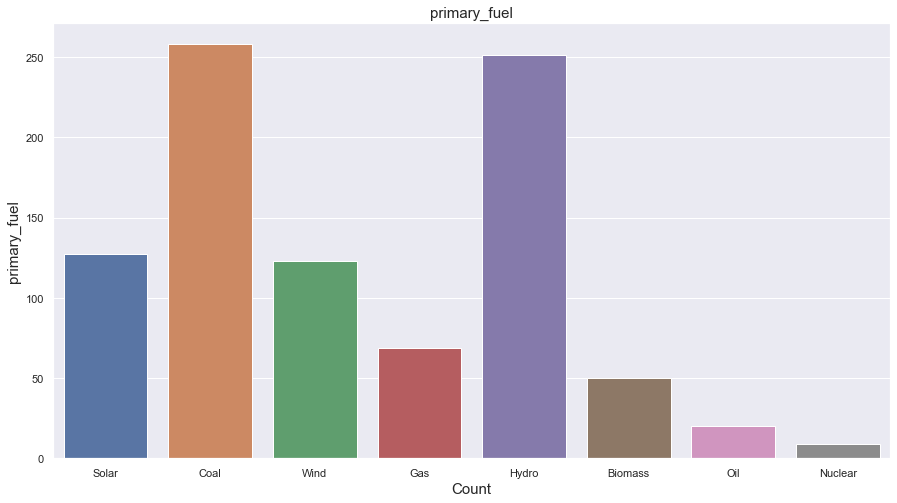

In [15]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,8))
sns.countplot(df['primary_fuel'] )
plt.xlabel('Count', fontsize=15 )
plt.ylabel('primary_fuel', fontsize=15 )
plt.title('primary_fuel', fontsize=15)

df['primary_fuel'].value_counts()

Observation: Here we can see, most of the power plants are using Coal and Hydro as the primary fuel.
Coal having maximum counts, which indicates most of the power generation plant using coal af primary fuel.
Use of solar and wind also considerable.

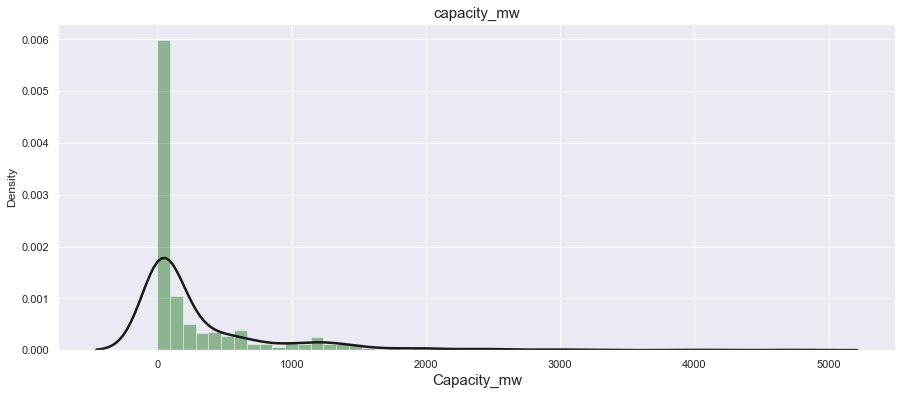

In [16]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,6))

sns.distplot(df['capacity_mw'], color='darkgreen',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('capacity_mw', fontsize=15)
plt.xlabel('Capacity_mw', fontsize=15)
plt.show()

Observation: Here we can see the probablity of capacity greater than 1000 is less.
Data is not normaly distributed.
Data having outliers.

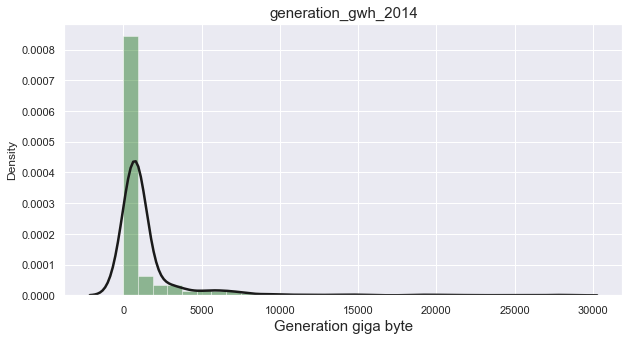

In [17]:
plt.figure(figsize=(10,5))

sns.distplot(df['generation_gwh_2014'], color='darkgreen',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('generation_gwh_2014', fontsize=15)
plt.xlabel('Generation giga byte', fontsize=15)
plt.show()

Observation: Data is not distributed normally, it is having skewness.

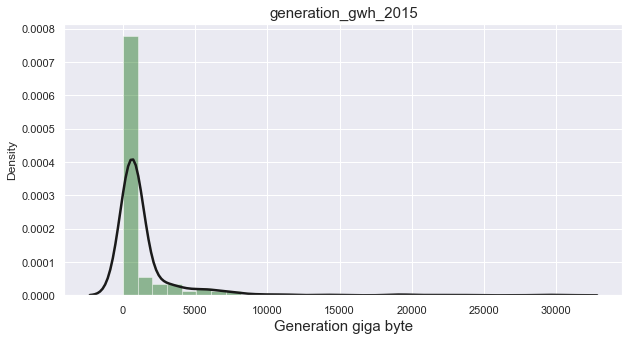

In [18]:
plt.figure(figsize=(10,5))

sns.distplot(df['generation_gwh_2015'], color='darkgreen',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('generation_gwh_2015', fontsize=15)
plt.xlabel('Generation giga byte', fontsize=15)
plt.show()



Observation: Data is not distributed normally, it is having skewness.

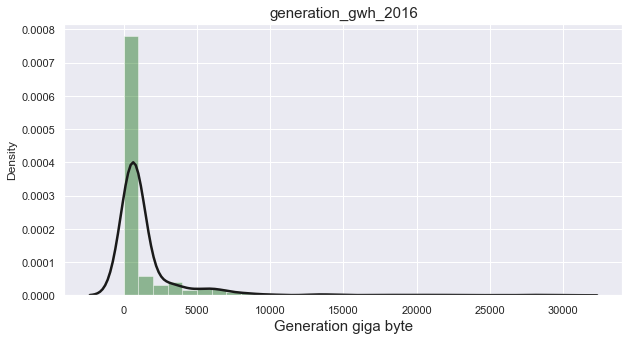

In [19]:
plt.figure(figsize=(10,5))

sns.distplot(df['generation_gwh_2016'], color='darkgreen',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('generation_gwh_2016', fontsize=15)
plt.xlabel('Generation giga byte', fontsize=15)
plt.show()

Observation: Data is not distributed normally, it is having skewness.

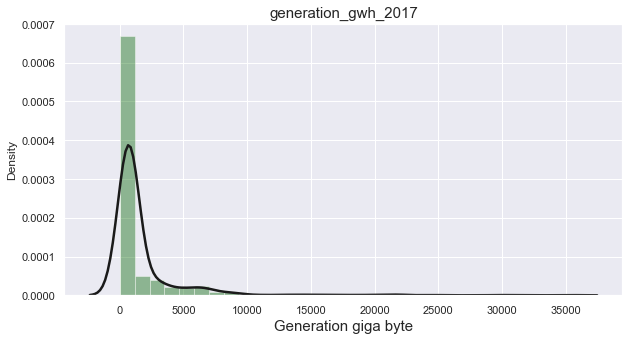

In [20]:
plt.figure(figsize=(10,5))

sns.distplot(df['generation_gwh_2017'], color='darkgreen',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('generation_gwh_2017', fontsize=15)
plt.xlabel('Generation giga byte', fontsize=15)
plt.show()

Observation: Data is not distributed normally, it is having skewness.

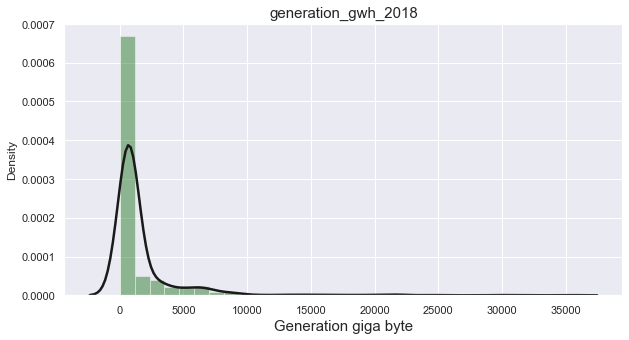

In [21]:
plt.figure(figsize=(10,5))

sns.distplot(df['generation_gwh_2017'], color='darkgreen',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('generation_gwh_2018', fontsize=15)
plt.xlabel('Generation giga byte', fontsize=15)
plt.show()

Observation: Data is not distributed normally, it is having skewness.

# Bivariate Analysis:

In bivariate analysis, we will analyse the features columns aagint target column.

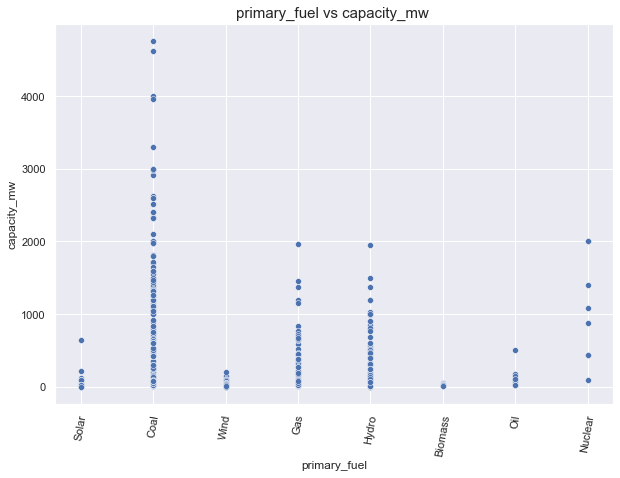

In [22]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x='primary_fuel',y='capacity_mw')
locs, labels = plt.xticks()
plt.title('primary_fuel vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

Observation: We can see most of the power capacity is due to coal.

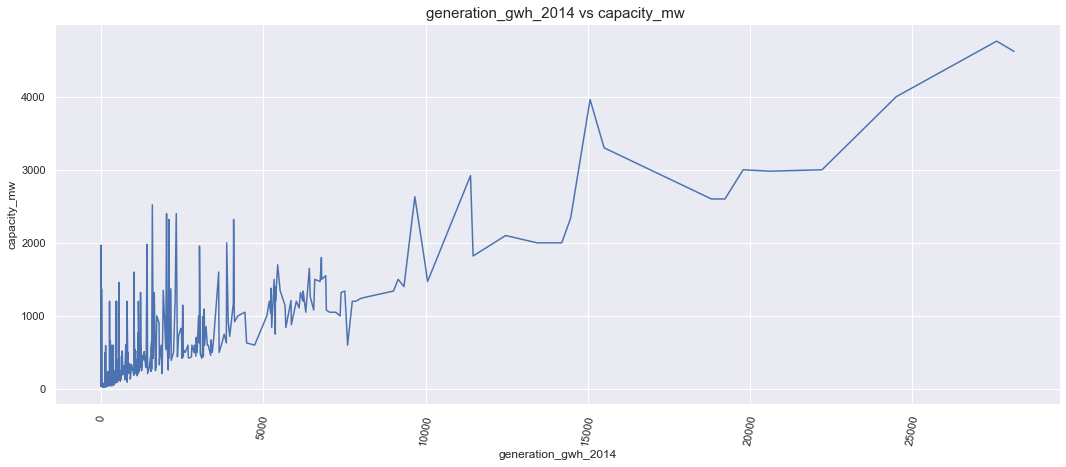

In [23]:
plt.figure(figsize=(18,7))
sns.lineplot(data=df, x='generation_gwh_2014',y='capacity_mw')
locs, labels = plt.xticks()
plt.title('generation_gwh_2014 vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

Observation: with higher capacity, generation_gwh_2014 also incresing.

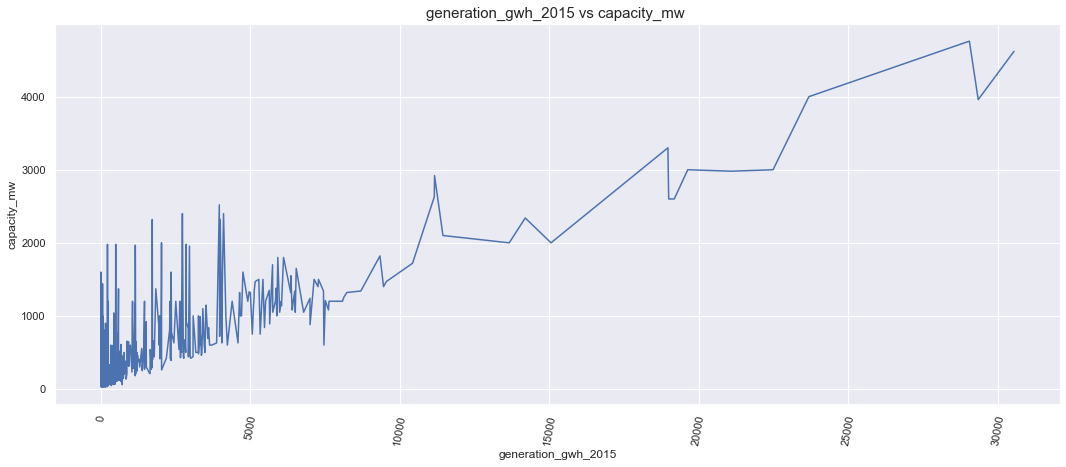

In [24]:
plt.figure(figsize=(18,7))
sns.lineplot(data=df, x='generation_gwh_2015',y='capacity_mw')
locs, labels = plt.xticks()
plt.title('generation_gwh_2015 vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

Observation: with higher capacity, generation_gwh_2015 also incresing.

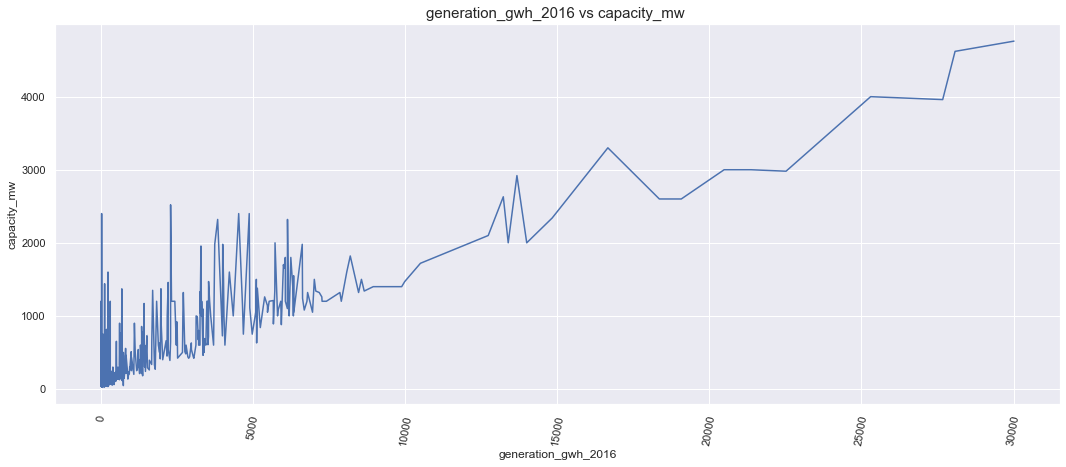

In [25]:
plt.figure(figsize=(18,7))
sns.lineplot(data=df, x='generation_gwh_2016',y='capacity_mw')
locs, labels = plt.xticks()
plt.title('generation_gwh_2016 vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

Observation: with higher capacity, generation_gwh_2016 also incresing.

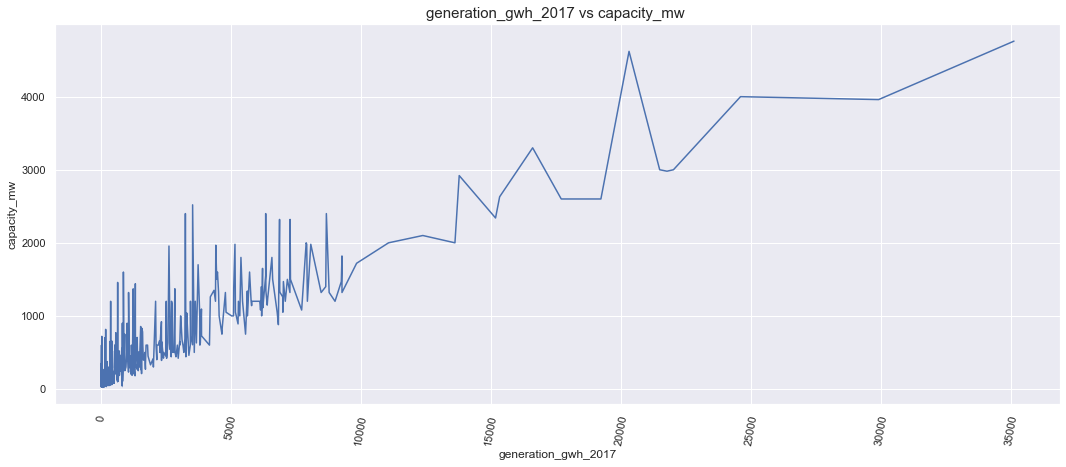

In [26]:
plt.figure(figsize=(18,7))
sns.lineplot(data=df, x='generation_gwh_2017',y='capacity_mw')
locs, labels = plt.xticks()
plt.title('generation_gwh_2017 vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

Observation: with higher capacity, generation_gwh_2017 also incresing.

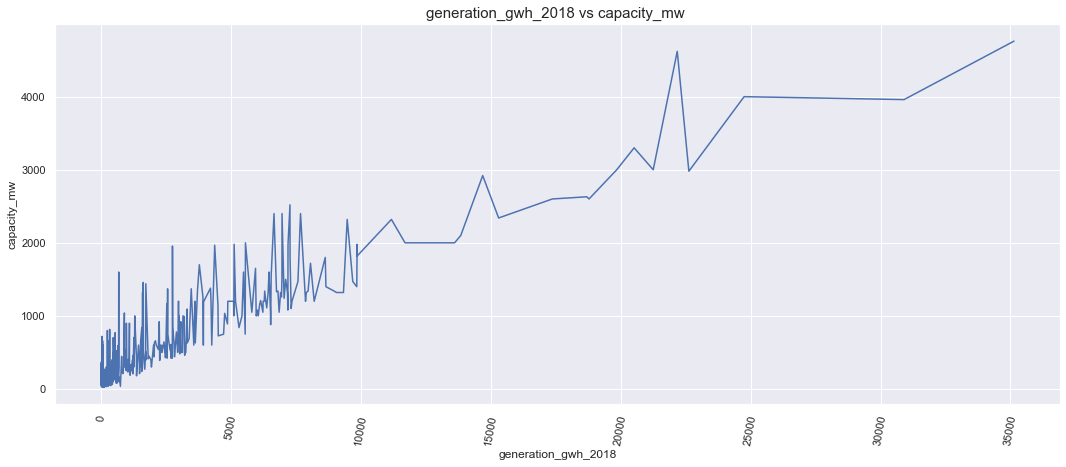

In [27]:
plt.figure(figsize=(18,7))
sns.lineplot(data=df, x='generation_gwh_2018',y='capacity_mw')
locs, labels = plt.xticks()
plt.title('generation_gwh_2018 vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

Observation: with higher capacity, generation_gwh_2018 also incresing.

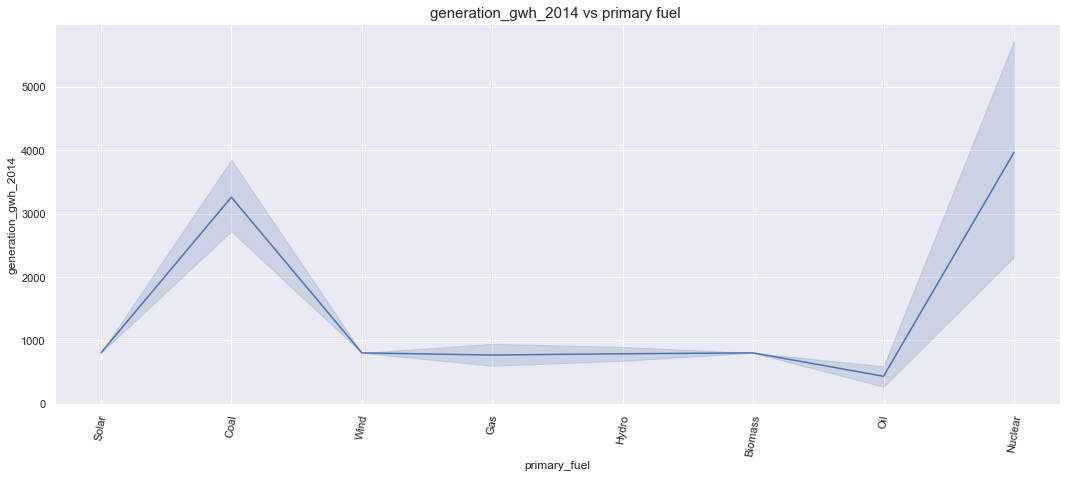

In [28]:
plt.figure(figsize=(18,7))
sns.lineplot(data=df, x='primary_fuel',y='generation_gwh_2014')
locs, labels = plt.xticks()
plt.title('generation_gwh_2014 vs primary fuel ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

Observation: We can see coal is the primary fuel for power generation.

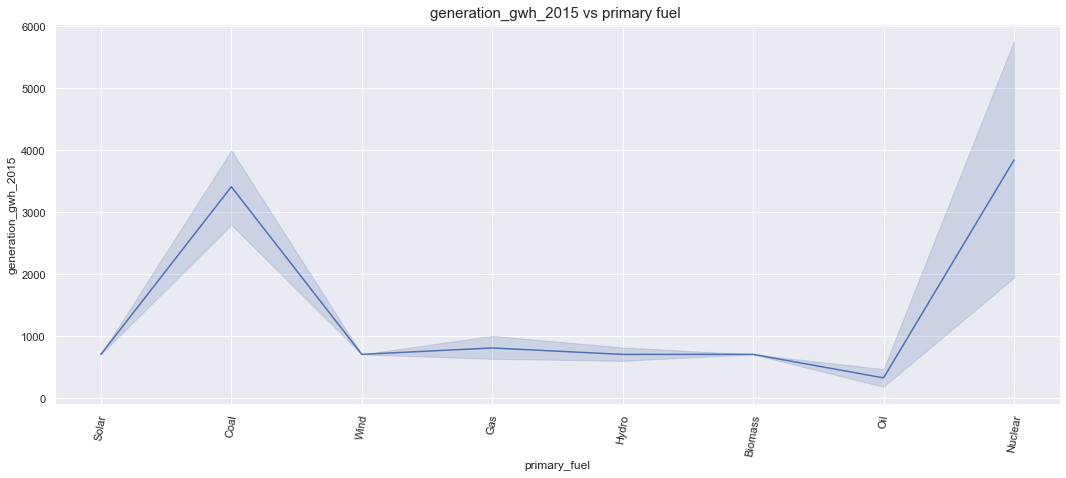

In [29]:
plt.figure(figsize=(18,7))
sns.lineplot(data=df, x='primary_fuel',y='generation_gwh_2015')
locs, labels = plt.xticks()
plt.title('generation_gwh_2015 vs primary fuel ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

Observation: Here also We can see coal is the primary fuel for power generation.

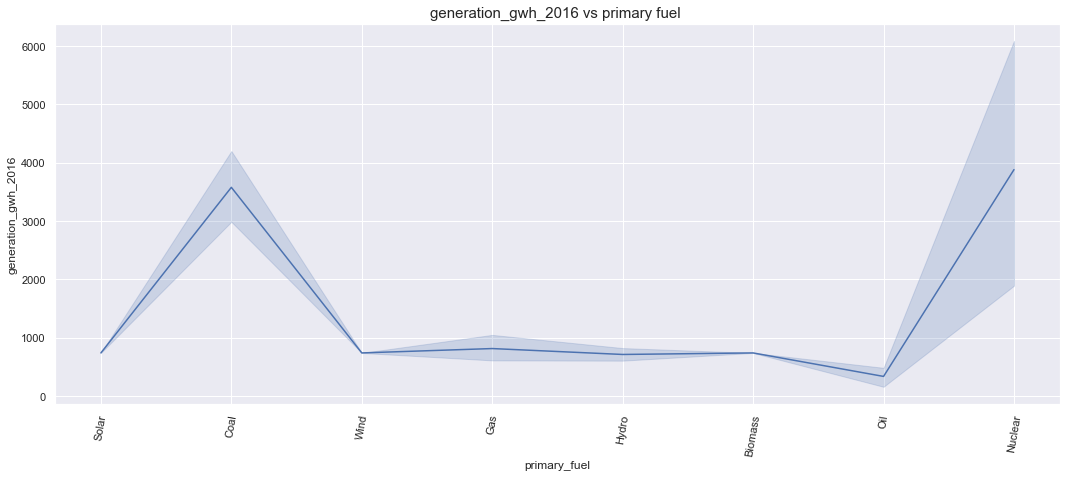

In [30]:
plt.figure(figsize=(18,7))
sns.lineplot(data=df, x='primary_fuel',y='generation_gwh_2016')
locs, labels = plt.xticks()
plt.title('generation_gwh_2016 vs primary fuel ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

Observation: Here also We can see coal is the primary fuel for power generation.

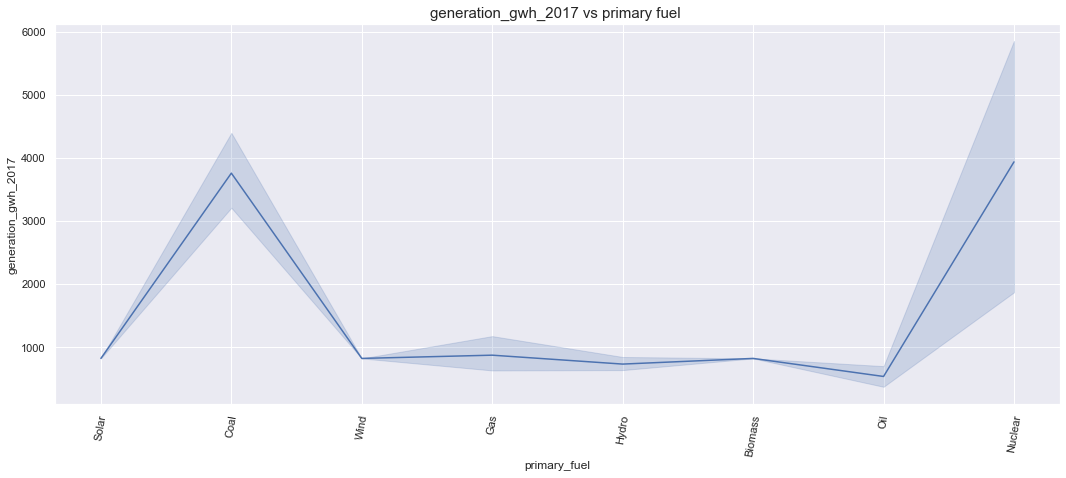

In [31]:
plt.figure(figsize=(18,7))
sns.lineplot(data=df, x='primary_fuel',y='generation_gwh_2017')
locs, labels = plt.xticks()
plt.title('generation_gwh_2017 vs primary fuel ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

Observation: Here also We can see coal is the primary fuel for power generation.

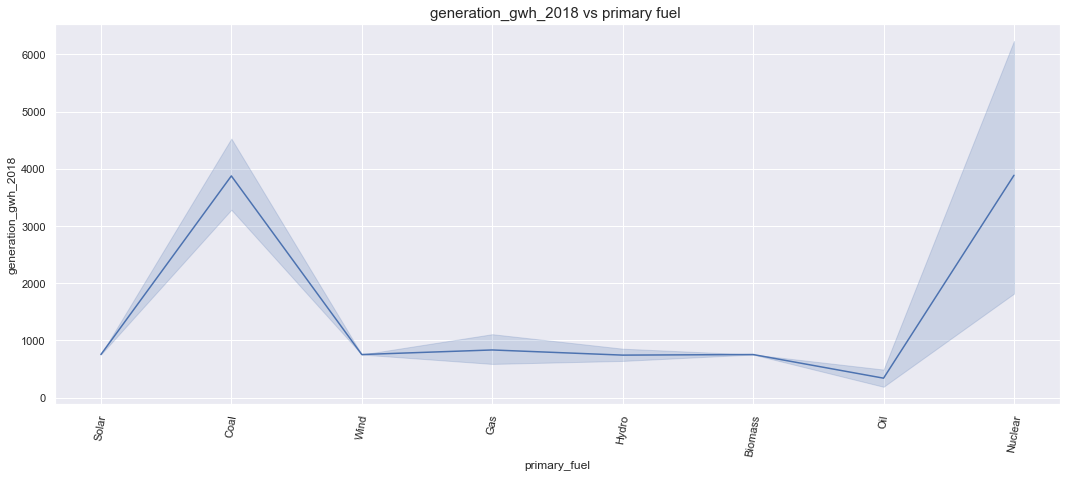

In [32]:
plt.figure(figsize=(18,7))
sns.lineplot(data=df, x='primary_fuel',y='generation_gwh_2018')
locs, labels = plt.xticks()
plt.title('generation_gwh_2018 vs primary fuel ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

Observation: Here also We can see coal is the primary fuel for power generation.

# Multivariate analysis

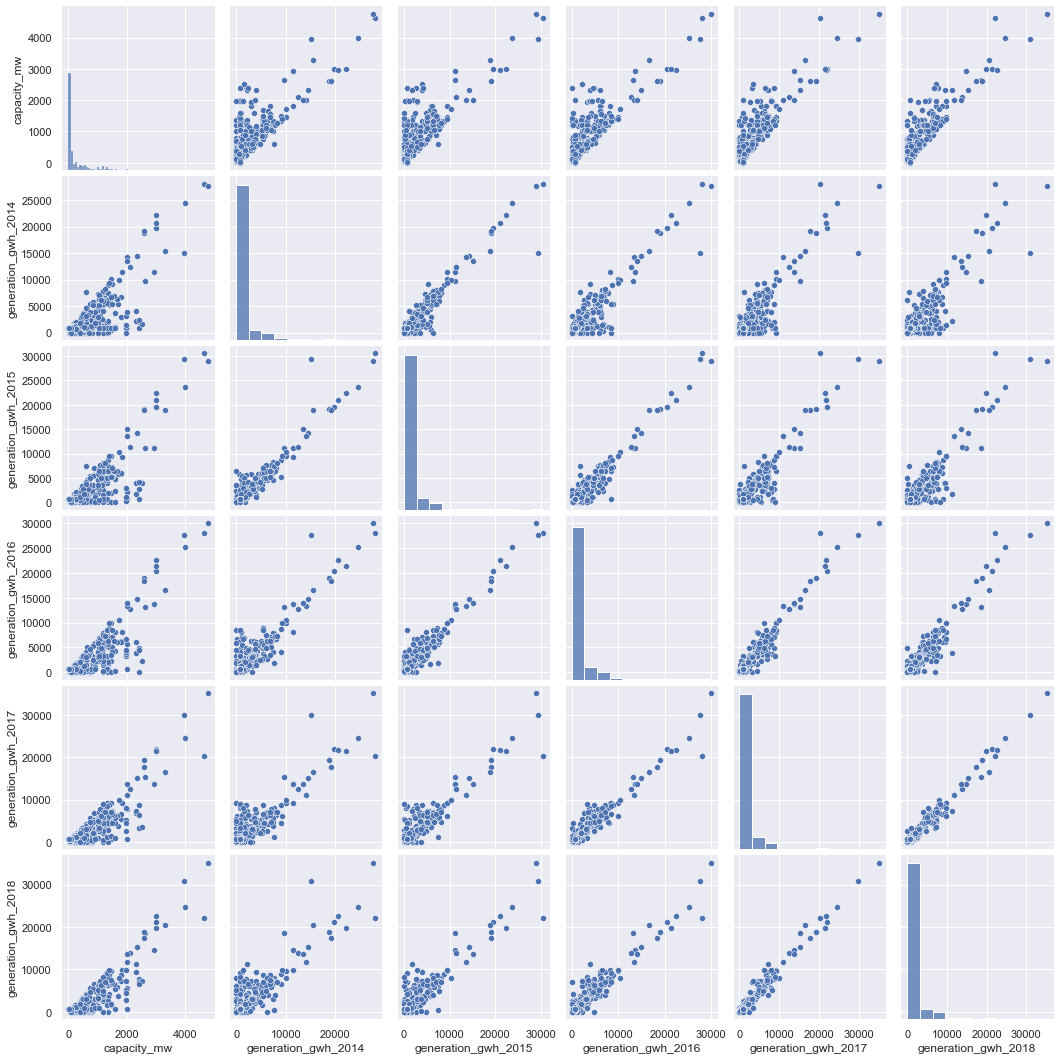

In [33]:
sns.pairplot(df)

# EDA Summary:

1. capacity_mw: with higher capacity, generation_gwh (generation growth) is also increasing every year.
2. most of the power plant is highly dependent on coal as primary fuel.
3. gas and hydro also playing a key role as primary fuel in the powerplant.
4. generation_gwh_2013-2018: we can see generation growth is almost same for each year

In [34]:
df.head()

,name,gppd_idnr,capacity_mw,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,WRI1020239,2.5,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375
1,ADITYA CEMENT WORKS,WRI1019881,98.0,Coal,Oil,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375
2,AES Saurashtra Windfarms,WRI1026669,39.2,Wind,Oil,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375
3,AGARTALA GT,IND0000001,135.0,Gas,Oil,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,AKALTARA TPP,IND0000002,1800.0,Coal,Oil,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


In [35]:
df['source'].unique()

array(['National Renewable Energy Laboratory', 'Ultratech Cement ltd',
       'CDM', 'Central Electricity Authority', 'Hindustan Pvt lt',
       'Dr Ssk ltd', 'Ashok Ssk ltd', 'Shree Sugars ltd', 'Navbharat',
       'Meil.In/P', 'Lancosola', 'Indian Power ltd',
       'Ballarpur Industries ltd', 'Jk Cement ltd', 'India Ltd icl)',
       'Ideal Projects ltd', 'Ugar Works ltd', 'Vishwanath Sugars ltd',
       'Hothur Pvt ltd', 'Janki Corp ltd', 'Mysore Mills ltd',
       'Sunflag Co ltd', 'Varam Pvt ltd', 'Sangam Spinners ltd',
       'Bharat Refinery ltd', 'Binani Industries ltd',
       'Indo Synthetics ltd', 'Ambed K Sugar', 'AES Winfra', 'Sembcorp',
       'Punj Lloyd', 'Hiraco India', 'Moserbaer Solar', 'Lingandwi',
       'LEPL', 'CleanEnerg teLeanenergy', 'Adani Power Limite r Er',
       'Madhav Group', 'Power Private edM/Pdf', 'Acc Acc ltd',
       'Birla Corp ltd', 'Hindustan Zinc ltd', 'Gupta Ltd gepl)',
       'Manikghar Cement co', 'Core Fuels ltd',
       'Maharashtra State

In [36]:
df['source'].nunique()

191

In [37]:
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', 'Industry About'],
      dtype=object)

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

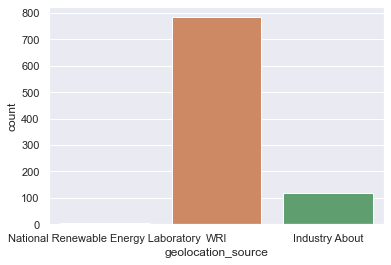

In [38]:
sns.countplot(df['geolocation_source'])
df['geolocation_source'].value_counts()

In [39]:
from sklearn.preprocessing import LabelEncoder
numerics = ['int8','int16','int32','int64','float16','float32','float64']
categorical_columns = []
features=df.columns.values.tolist()

for col in features:
    if df[col].dtypes in numerics:
        continue
    df[col] = LabelEncoder().fit_transform(df[col])

df

,name,gppd_idnr,capacity_mw,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0,657,2.5,6,2,109,1,801.123775,711.181225,737.205450,817.977250,751.644375
1,1,519,98.0,1,2,174,2,801.123775,711.181225,737.205450,817.977250,751.644375
2,2,853,39.2,7,2,21,2,801.123775,711.181225,737.205450,817.977250,751.644375
3,3,0,135.0,2,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,4,1,1800.0,1,2,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
902,902,491,1600.0,1,2,22,2,801.123775,0.994875,233.596650,865.400000,686.500000
903,903,822,3.0,6,2,77,0,801.123775,711.181225,737.205450,817.977250,751.644375
904,904,891,25.5,7,2,21,2,801.123775,711.181225,737.205450,817.977250,751.644375
905,905,539,80.0,1,2,59,2,801.123775,711.181225,737.205450,817.977250,751.644375


# Data Processing

Here we can see, name, gppd_idnr are not playing good role, we can drop these columns.

In [40]:
df=df.drop(['name','gppd_idnr'], axis=1)

In [41]:
df.head()

,capacity_mw,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,6,2,109,1,801.123775,711.181225,737.205450,817.977250,751.644375
1,98.0,1,2,174,2,801.123775,711.181225,737.205450,817.977250,751.644375
2,39.2,7,2,21,2,801.123775,711.181225,737.205450,817.977250,751.644375
3,135.0,2,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,1,2,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


In [42]:
df.shape

(907, 10)

# Checking for duplicates:

In [45]:
#Checking and removing if there is any Duplicate entry present in our dataset
df.drop_duplicates(inplace=True)
df.shape

(814, 10)

Obsservation: Here we can observe that , there are 93 duplicates were there and we successfully remove them.

# Plotting the Heatmap:

<AxesSubplot:>

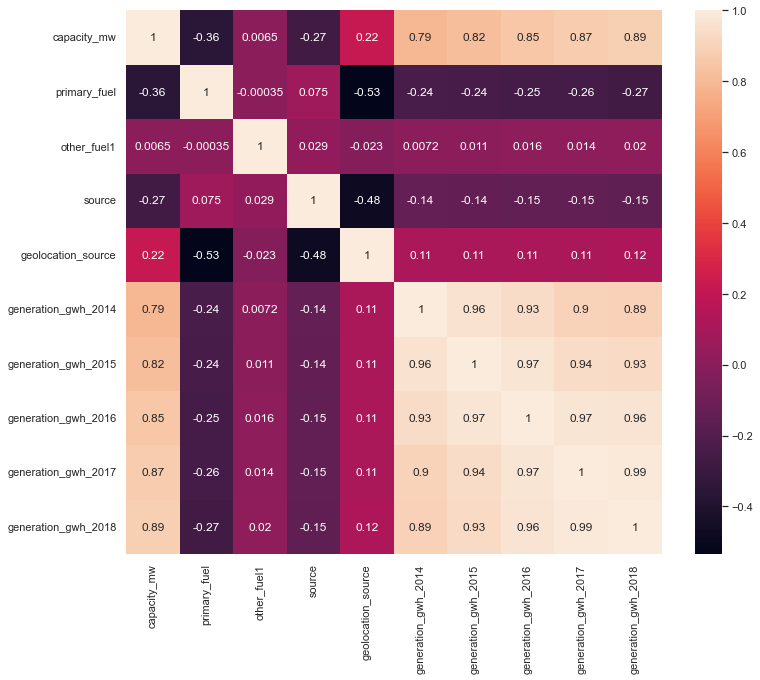

In [46]:
df_corr=df.corr()

plt.figure(figsize=(12,10))
sns.heatmap(df_corr,annot=True,annot_kws={'size':12})

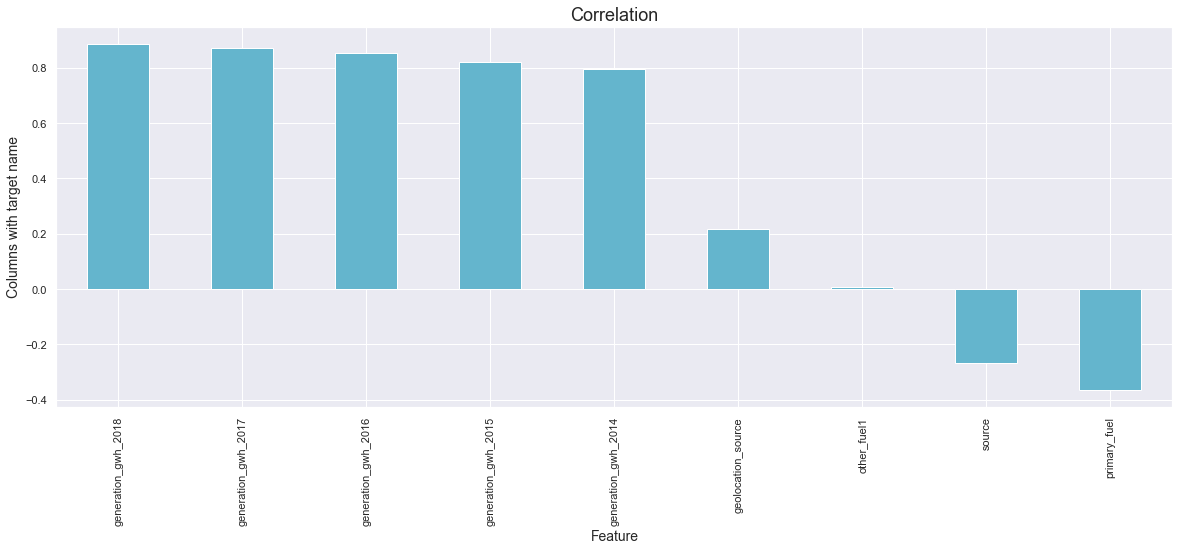

In [47]:
plt.figure(figsize=(20,7))
df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Columns with target name', fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

Observation: 

Here we can see only primary fuel and source is negative correlated with capacity megawatt, all othere parameters are having strong positve correlation.

From heat map we can see generation growth columns are highly correlacted with each other.

But we need some more proof to treat them


In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [52]:
# Checking for Multicollinearity using VIF

w = df[list(df.columns)]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(w.values, i) for i in range(w.shape[1])]
vif_info['Column'] = w.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
8,67.243263,generation_gwh_2017
9,55.774215,generation_gwh_2018
7,55.619720,generation_gwh_2016
6,42.944975,generation_gwh_2015
2,32.402888,other_fuel1
5,18.257812,generation_gwh_2014
4,14.151862,geolocation_source
0,7.515073,capacity_mw
1,4.719986,primary_fuel
3,2.978784,source


Observation: here we can see that capacity_mw, geolocation_source, generation_gwh_2014, other_fuel1, generation_gwh_2015, generation_gwh_2016, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018 having value more than 5. that means there is multicollinearity problem exists with these columns, they are highly correlated with each other

Observation: Now the question comes which feature we are going to drop?

whichever feature having less correlation coefficient with target variable i.e., capacity_mw . we'll drop them.



Conclusion: We are going to drop generation_gwh_2017 column.

And why is that? As generation_gwh_2017 and generation_gwh_2018 are highly correlated with each other and that number is 0.99. So including both the feature will give us the same result. That's we are droping one of them.

In [53]:
df1=df.drop(['generation_gwh_2017'],axis=1)

In [54]:
df1.shape

(814, 9)

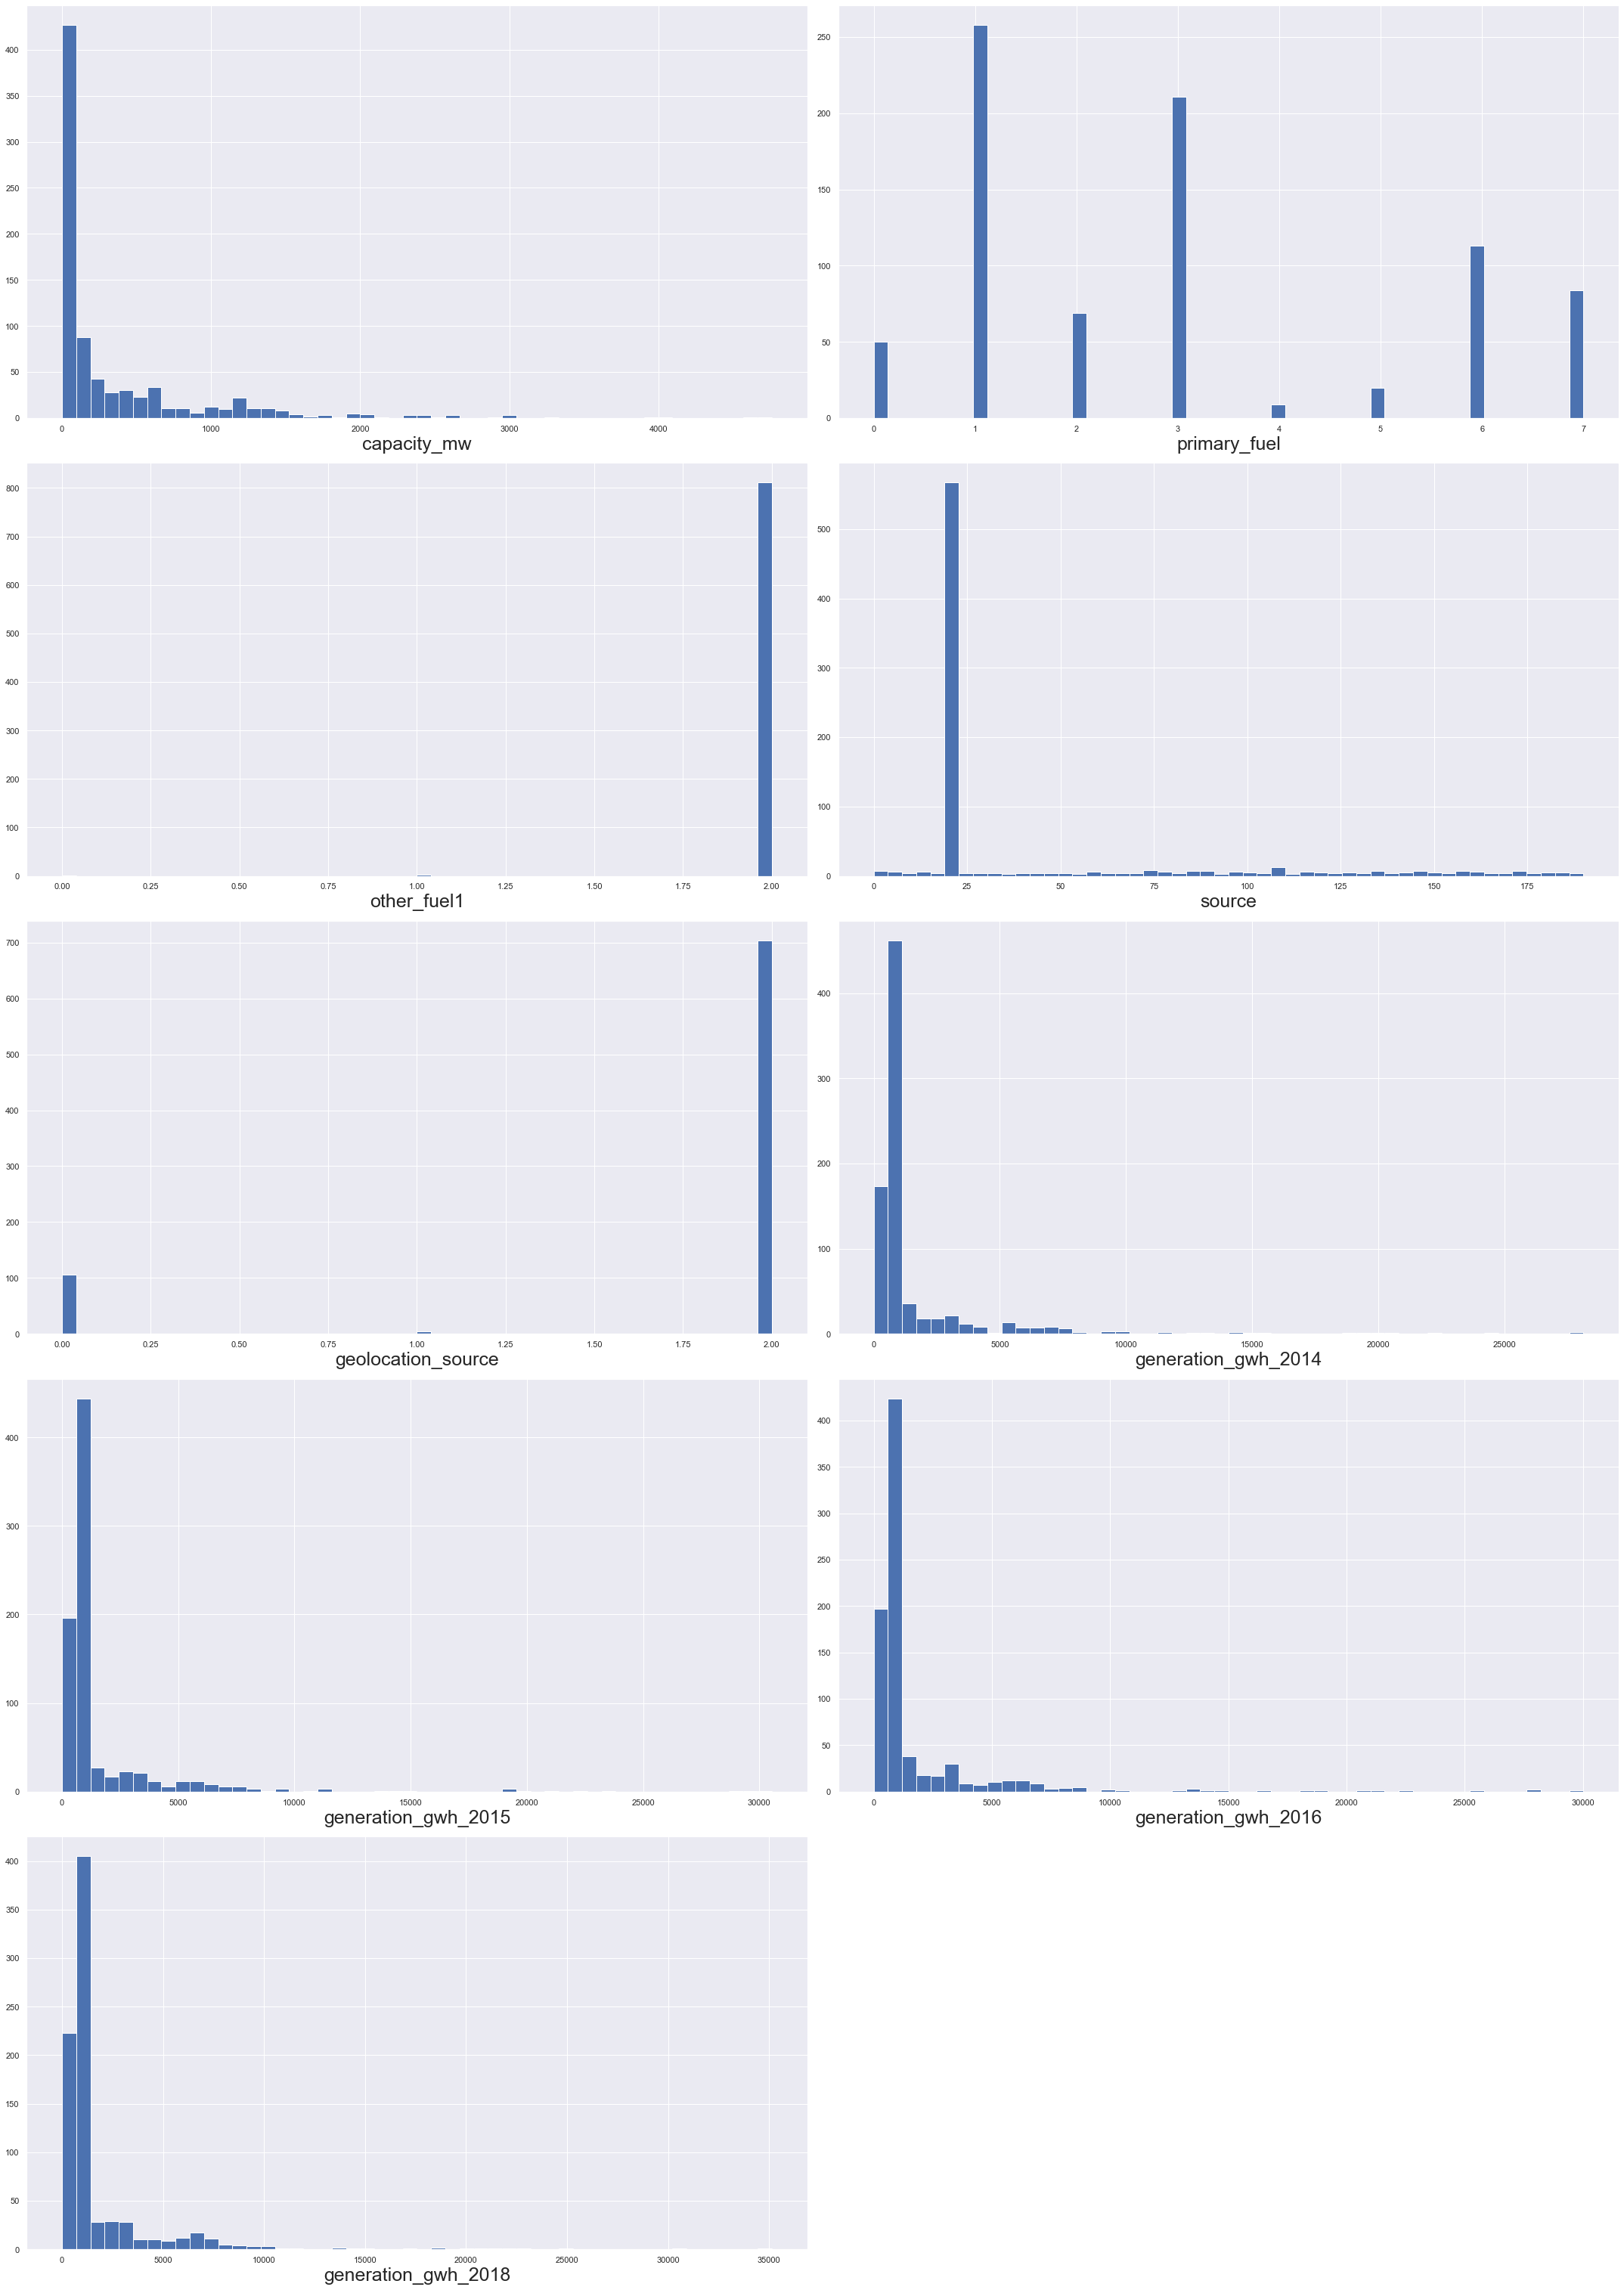

In [55]:
plt.figure(figsize=[30,50])
plotnumber=1

for column in df1:
    if plotnumber<=12:
        ax=plt.subplot(6,2,plotnumber)
        plt.hist(df1[column], bins=50)
        plt.xlabel(column, fontsize=25)
    plotnumber+=1
plt.tight_layout()

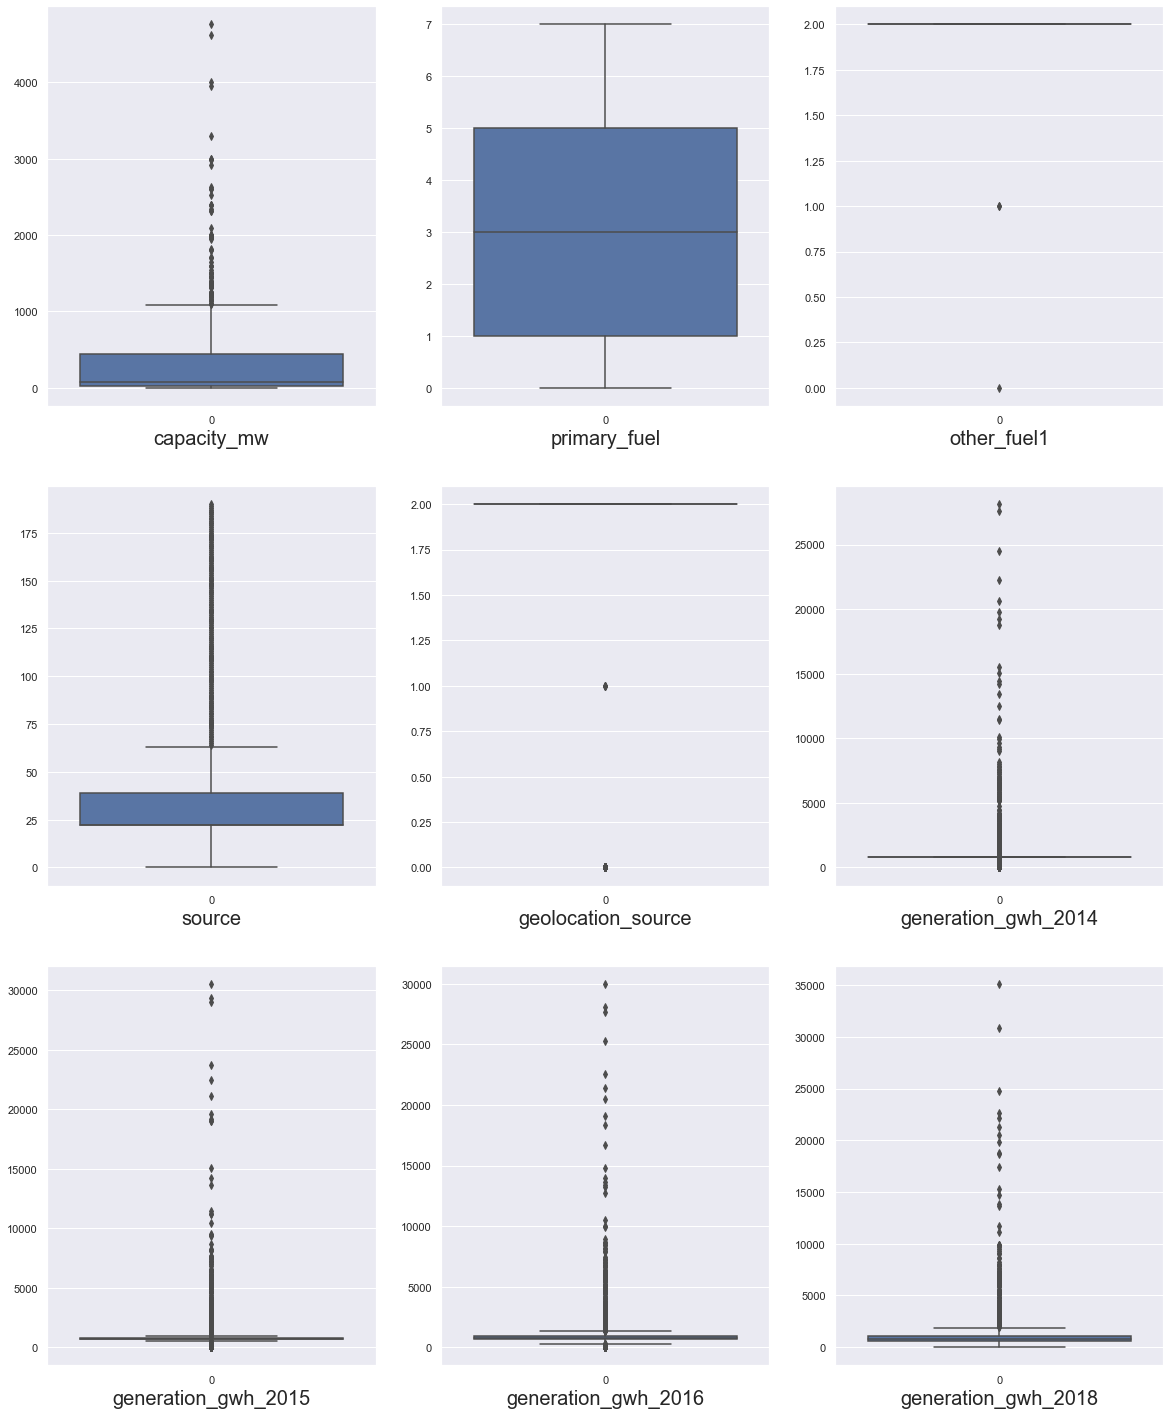

In [57]:
#Let's check for outliers
plt.figure(figsize=(20,25))
graph=1
for column in df1:
    if graph<=9:
        ax=plt.subplot(3,3,graph)
        sns.boxplot(data=df1[column])
        plt.xlabel(column,fontsize=20)
    graph+=1
plt.show()

In [58]:
from scipy.stats import zscore
z= np.abs(zscore(df1))

In [59]:
threshold= 3 
print(np.where(z>3))

(array([ 15,  15,  15,  15,  65, 135, 135, 135, 135, 135, 139, 150, 183,
       198, 198, 198, 198, 282, 291, 291, 291, 291, 291, 303, 343, 344,
       344, 344, 344, 344, 354, 450, 459, 459, 459, 459, 459, 460, 460,
       460, 460, 460, 601, 601, 601, 601, 601, 609, 609, 609, 609, 609,
       613, 620, 643, 643, 643, 643, 643, 667, 667, 667, 670, 670, 670,
       670, 671, 671, 671, 671, 671, 703, 716, 716, 716, 716, 716, 718,
       736, 736, 736, 736, 736, 739, 741, 745, 755, 794, 795, 795, 795,
       795, 795, 810], dtype=int64), array([0, 6, 7, 8, 3, 0, 5, 6, 7, 8, 0, 5, 3, 5, 6, 7, 8, 3, 0, 5, 6, 7,
       8, 3, 0, 0, 5, 6, 7, 8, 0, 0, 0, 5, 6, 7, 8, 0, 5, 6, 7, 8, 0, 5,
       6, 7, 8, 0, 5, 6, 7, 8, 3, 3, 0, 5, 6, 7, 8, 5, 6, 7, 5, 6, 7, 8,
       0, 5, 6, 7, 8, 0, 0, 5, 6, 7, 8, 0, 0, 5, 6, 7, 8, 2, 2, 2, 3, 3,
       0, 5, 6, 7, 8, 3], dtype=int64))


In [61]:
df2=df1[(z<3).all(axis=1)]
print(df1.shape)
print(df2.shape)

(814, 9)
(779, 9)


Observation: we have left with 779 data in our dataset. And we are not going to perform any more outliers removal here because of the less data we have.

In [64]:
Loss_percentage=(814-779)/814*100
print(Loss_percentage)

4.2997542997543


Observation: Data loss is less than the 1ess than 10 percent, we canproceed with new data.

In [63]:
df2['primary_fuel'].value_counts()

1    233
3    211
6    109
7     84
2     68
0     47
5     18
4      9
Name: primary_fuel, dtype: int64

Observation: Data seems pretty good and it is balanced

# Checking Skewness:

In [65]:
df2.skew()

capacity_mw            1.856636
primary_fuel           0.565006
other_fuel1            0.000000
source                 1.741665
geolocation_source    -2.159159
generation_gwh_2014    2.853775
generation_gwh_2015    2.668796
generation_gwh_2016    2.604282
generation_gwh_2018    2.496964
dtype: float64

In [71]:
from sklearn.preprocessing import power_transform 

# Divide the data into features and vectors.

x=df2.drop(['capacity_mw'], axis=1)
y=df2['capacity_mw']


In [72]:
x[['source','geolocation_source','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2018','primary_fuel']]=power_transform(x[['source','geolocation_source','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2018','primary_fuel']],method='yeo-johnson')

In [73]:
x.skew()

primary_fuel          -0.032903
other_fuel1            0.000000
source                -0.159567
geolocation_source    -2.127679
generation_gwh_2014    0.176501
generation_gwh_2015    0.124457
generation_gwh_2016    0.108622
generation_gwh_2018    0.090586
dtype: float64

Observation: all skewness have been removed except geolocation_source. it is still ok. we are good to go with as this feature not that much important

# Standardization of data:

In [74]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)

Observation: here we are standardized the data. so, my model will not going to treat any data points on priority note. That's why we are scaling the data and model will each data point equally

# checking for null:

In [75]:
pd.DataFrame(x).isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64

Observation: there is no any null values in our scalling data. we are good to go

# Describe the data:

In [76]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7
count,779.000000,779.0,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000
mean,0.564315,0.0,0.773109,0.864254,0.453866,0.458340,0.463850,0.470565
std,0.289028,0.0,0.109847,0.342293,0.176981,0.183400,0.186674,0.198088
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.293474,0.0,0.727937,1.000000,0.448739,0.433594,0.432486,0.426060
50%,0.625150,0.0,0.727937,1.000000,0.450379,0.452817,0.458585,0.463647
75%,0.838837,0.0,0.810939,1.000000,0.450379,0.452817,0.458585,0.481647
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Obseravtion: we can clearly see here, all our data points have been scaled

# Spliting the dataset into training and testing:

In [77]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [78]:
from sklearn.linear_model import LinearRegression

LR=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state {i}, The training accuracy is:-{r2_score(y_train,LR_predict_train)}')
    print(f'At random state {i}, The test accuracy is:-{r2_score(y_test,LR_predict_test)}')

At random state 0, The training accuracy is:-0.5124288649757551
At random state 0, The test accuracy is:-0.4914277275744824
At random state 1, The training accuracy is:-0.5007631514656694
At random state 1, The test accuracy is:-0.5401729705989593
At random state 2, The training accuracy is:-0.5016917663436188
At random state 2, The test accuracy is:-0.5254163456540404
At random state 3, The training accuracy is:-0.510763211271353
At random state 3, The test accuracy is:-0.48792003383940474
At random state 4, The training accuracy is:-0.49918984987382753
At random state 4, The test accuracy is:-0.5291539504908436
At random state 5, The training accuracy is:-0.5284151717770604
At random state 5, The test accuracy is:-0.39376782527816934
At random state 6, The training accuracy is:-0.4986523698618738
At random state 6, The test accuracy is:-0.5234894806310544
At random state 7, The training accuracy is:-0.5313005857333342
At random state 7, The test accuracy is:-0.40362025489512876
At ra

Observation: At random state 97 giving highest accuracy of 0.612. so we are choosing that as random state

splitting the data:

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=97)

In [80]:
x_train.shape

(607, 8)

In [81]:
y_train.shape

(607,)

In [82]:
x_test.shape

(172, 8)

In [83]:
y_test.shape

(172,)

# Model Building:

# Linear Regression:

In [84]:
LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.47884999008510254


In [85]:
print('MSE:',mean_squared_error(LR_predict,y_test))
print('MAE:',mean_absolute_error(LR_predict,y_test))
print('r2_score:',r2_score(LR_predict,y_test))
cross_Val = cross_val_score(LR,x,y,cv=10)
print("Cross validation",cross_Val.mean())

MSE: 72787.1343575678
MAE: 211.86538510869744
r2_score: 0.21151143143491535
Cross validation 0.4245331108200897


# Ridge:

In [86]:
from sklearn.linear_model import Ridge

R=Ridge()
R.fit(x_train,y_train)
print(R.score(x_train,y_train))
R_predict=R.predict(x_test)

0.4775150078642332


In [88]:
print('MSE:',mean_squared_error(R_predict,y_test))
print('MAE:',mean_absolute_error(R_predict,y_test))
print('r2_score:',r2_score(R_predict,y_test))
cross_Val = cross_val_score(R,x,y,cv=10)
print("Cross validation",cross_Val.mean())

MSE: 74017.24810738151
MAE: 212.36937251699635
r2_score: 0.14653712189509926
Cross validation 0.4334036008131673


# SVR:

In [89]:
from sklearn.svm import SVR

svr=SVR(kernel='linear')
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
svr_predict=svr.predict(x_test)

-0.12877868461458886


In [90]:
print('MSE:',mean_squared_error(svr_predict,y_test))
print('MAE:',mean_absolute_error(svr_predict,y_test))
print('r2_score:',r2_score(svr_predict,y_test))
cross_Val = cross_val_score(svr,x,y,cv=10)
print("Cross validation",cross_Val.mean())

MSE: 209783.11842731058
MAE: 253.3464058020046
r2_score: -182.3521236786132
Cross validation -0.12737960225851025


# RandomForestRegressor:

In [91]:
from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor()
RF.fit(x_train,y_train)
print(RF.score(x_train,y_train))
RF_PRED=RF.predict(x_test)

0.9582537265120956


In [92]:
print('MSE:',mean_squared_error(RF_PRED,y_test))
print('MAE:',mean_absolute_error(RF_PRED,y_test))
print('r2_score:',r2_score(RF_PRED,y_test))
cross_Val = cross_val_score(RF,x,y,cv=10)
print("Cross validation",cross_Val.mean())

MSE: 31449.291488582356
MAE: 103.89843611130341
r2_score: 0.8356303109349835
Cross validation 0.7583249705471653


# Decision Tree Regressor:

In [93]:
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
print(DTR.score(x_train,y_train))
DTR_PRED=DTR.predict(x_test)

0.9861071276265788


In [94]:
print('MSE:',mean_squared_error(DTR_PRED,y_test))
print('MAE:',mean_absolute_error(DTR_PRED,y_test))
print('r2_score:',r2_score(DTR_PRED,y_test))
cross_Val = cross_val_score(DTR,x,y,cv=10)
print("Cross validation",cross_Val.mean())

MSE: 58815.20972272031
MAE: 125.00839680119094
r2_score: 0.7570432423761371
Cross validation 0.5921820987394886


# Gradient Boost Regressor:

In [95]:
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
print(GBR.score(x_train,y_train))
GBR_PRED=GBR.predict(x_test)

0.9260760511852243


In [96]:
print('MSE:',mean_squared_error(GBR_PRED,y_test))
print('MAE:',mean_absolute_error(GBR_PRED,y_test))
print('r2_score:',r2_score(GBR_PRED,y_test))
cross_Val = cross_val_score(GBR,x,y,cv=10)
print("Cross validation",cross_Val.mean())

MSE: 38195.946432916135
MAE: 115.58066724214062
r2_score: 0.8029888773152046
Cross validation 0.7081943714116553


Observation: According to all metrics score we are selecting RandomForest model is best suited model for this dataset. As difference between r2 score and cross validation score is minimum comparitively to all models. Hence, we are good to go with RandomForest model

# Hyperparameter Tuning:

# GridSearchCV:

In [97]:
from sklearn.model_selection import GridSearchCV

In [108]:
param_grid={'n_estimators':[13,15],
            'criterion':['mse', 'absolute_error','squared_error','poisson'],
            'max_features':['auto', 'sqrt', 'log2'],
           'max_depth':[10,15],
           'min_samples_split':[10,11],
            'min_samples_leaf':[5,6]
           }

In [109]:
gridsearch=GridSearchCV(estimator=RF,param_grid=param_grid,cv=5,n_jobs=-1)

In [110]:
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'absolute_error', 'squared_error',
                                       'poisson'],
                         'max_depth': [10, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 6],
                         'min_samples_split': [10, 11],
                         'n_estimators': [13, 15]})

In [111]:
gridsearch.best_params_

{'criterion': 'squared_error',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 11,
 'n_estimators': 13}

In [112]:
RF=gridsearch.best_estimator_
RF.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, max_features='auto', min_samples_leaf=5,
                      min_samples_split=11, n_estimators=13)

In [113]:
print(RF.score(x_train,y_train))
RF_PRED=RF.predict(x_test)

0.8519995758319859


In [114]:
print('MSE:',mean_squared_error(RF_PRED,y_test))
print('MAE:',mean_absolute_error(RF_PRED,y_test))
print('r2_score:',r2_score(RF_PRED,y_test))
cross_Val = cross_val_score(RF,x,y,cv=10)
print("Cross validation",cross_Val.mean())

MSE: 27180.878927571623
MAE: 99.29529208629745
r2_score: 0.8473401021015221
Cross validation 0.7726277191663369


# Observation: we can clearly see here, with the help of hyperparameter tunning we are able to improve the r2_score as well as cross validation score.
r2_score is increased by 1% and cross validation score is also increasing by 1%. 

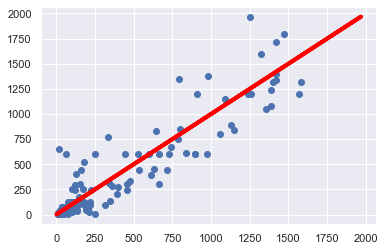

In [115]:
plt.scatter(RF_PRED,y_test)
plt.plot(y_test,y_test,linewidth=4,color='Red')

# Saving the model:

In [116]:
import pickle
filename='Powerplant_capacity_mw.pkl'
pickle.dump(RF,open(filename,'wb'))

# Conclusion:

In [117]:
loaded_model=pickle.load(open('Powerplant_capacity_mw.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

85.54305441768777


# Lets predict the primary fuel.

In [118]:
df2.head()

,capacity_mw,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2018
0,2.5,6,2,109,1,801.123775,711.181225,737.205450,751.644375
1,98.0,1,2,174,2,801.123775,711.181225,737.205450,751.644375
2,39.2,7,2,21,2,801.123775,711.181225,737.205450,751.644375
3,135.0,2,2,22,2,617.789264,843.747000,886.004428,626.239128
4,1800.0,1,2,22,2,3035.550000,5916.370000,6243.000000,7279.000000


In [119]:
df2.shape

(779, 9)

In [120]:
# deviding into fetures and target. 
X=df2.drop(['primary_fuel'], axis=1)
Y=df2['primary_fuel']

In [122]:
X.skew()

capacity_mw            1.856636
other_fuel1            0.000000
source                 1.741665
geolocation_source    -2.159159
generation_gwh_2014    2.853775
generation_gwh_2015    2.668796
generation_gwh_2016    2.604282
generation_gwh_2018    2.496964
dtype: float64

In [123]:
X[['source','geolocation_source','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2018','capacity_mw']]=power_transform(X[['source','geolocation_source','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2018','capacity_mw']],method='yeo-johnson')

In [124]:
X.skew()

capacity_mw           -0.008226
other_fuel1            0.000000
source                -0.159567
geolocation_source    -2.127679
generation_gwh_2014    0.176501
generation_gwh_2015    0.124457
generation_gwh_2016    0.108622
generation_gwh_2018    0.090586
dtype: float64

Observation: all skewness have been removed except geolocation_source. it is still ok. we are good to go with as this feature not that much important

# Standardization of data:

In [131]:
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

# checking for null:

In [132]:
pd.DataFrame(X).isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64

Observation: there is no any null values in our scalling data. we are good to go

# Describe the data:

In [133]:
pd.DataFrame(X).describe()

,0,1,2,3,4,5,6,7
count,779.000000,779.0,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000
mean,0.570886,0.0,0.773109,0.864254,0.453866,0.458340,0.463850,0.470565
std,0.235310,0.0,0.109847,0.342293,0.176981,0.183400,0.186674,0.198088
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.398768,0.0,0.727937,1.000000,0.448739,0.433594,0.432486,0.426060
50%,0.555766,0.0,0.727937,1.000000,0.450379,0.452817,0.458585,0.463647
75%,0.779799,0.0,0.810939,1.000000,0.450379,0.452817,0.458585,0.481647
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Obseravtion: we can clearly see here, all our data points have been scaled

# Spliting the dataset into training and testing:

In [134]:
LG=LinearRegression()

for i in range(0,100):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.22,random_state=i)
    LG.fit(X_train,Y_train)
    LG_predict_train=LG.predict(X_train)
    LG_predict_test=LG.predict(X_test)
    print(f'At random state {i}, The training accuracy is:-{r2_score(Y_train,LG_predict_train)}')
    print(f'At random state {i}, The test accuracy is:-{r2_score(Y_test,LG_predict_test)}')

At random state 0, The training accuracy is:-0.4292130415010421
At random state 0, The test accuracy is:-0.4189460057365846
At random state 1, The training accuracy is:-0.4180126527151662
At random state 1, The test accuracy is:-0.4468915654034953
At random state 2, The training accuracy is:-0.42076205365320396
At random state 2, The test accuracy is:-0.45496503200402216
At random state 3, The training accuracy is:-0.4371840579281757
At random state 3, The test accuracy is:-0.37867986578742907
At random state 4, The training accuracy is:-0.40620967571582367
At random state 4, The test accuracy is:-0.5099447941349073
At random state 5, The training accuracy is:-0.44346798969226486
At random state 5, The test accuracy is:-0.3496662366557346
At random state 6, The training accuracy is:-0.4226628097048152
At random state 6, The test accuracy is:-0.4447199541551806
At random state 7, The training accuracy is:-0.4384529917178519
At random state 7, The test accuracy is:-0.38710969887573643
At

Observation: At random state 26 giving highest accuracy of 0.515. so we are choosing that as random state

In [135]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.22,random_state=26)

In [136]:
x_train.shape

(607, 8)

In [137]:
y_train.shape

(607,)

In [138]:
x_test.shape

(172, 8)

In [139]:
y_test.shape

(172,)

# Model Building:

# Linear Regression:

In [140]:
LG=LinearRegression()
LG.fit(X_train,Y_train)
print(LG.score(X_train,Y_train))
LG_predict=LG.predict(X_test)

0.4041949616752194


In [141]:
print('MSE:',mean_squared_error(LG_predict,Y_test))
print('MAE:',mean_absolute_error(LG_predict,Y_test))
print('r2_score:',r2_score(LG_predict,Y_test))
cross_Val = cross_val_score(LG,X,Y,cv=10)
print("Cross validation",cross_Val.mean())

MSE: 2.302805996592053
MAE: 1.1330253522393574
r2_score: -0.13363858779586102
Cross validation 0.40133367879890247


# Ridge:

In [142]:
from sklearn.linear_model import Ridge

RD=Ridge()
RD.fit(X_train,Y_train)
print(RD.score(X_train,Y_train))
RD_predict=RD.predict(X_test)

0.40250998333789056


In [144]:
print('MAE:',mean_absolute_error(RD_predict,Y_test))
print('MSE:',mean_squared_error(RD_predict,Y_test))
print('r2_score:',r2_score(RD_predict,Y_test))
cross_Val = cross_val_score(RD,X,Y,cv=10)
print("Cross validation",cross_Val.mean())

MAE: 1.1317883548806054
MSE: 2.316912772718871
r2_score: -0.19851771515254835
Cross validation 0.4026142559407445


# SVR:

In [145]:
from sklearn.svm import SVR

svrK=SVR(kernel='linear')
svrK.fit(X_train,Y_train)
print(svrK.score(X_train,Y_train))
svrK_predict=svrK.predict(X_test)

0.3575655259179136


In [146]:
print('MSE:',mean_squared_error(svrK_predict,Y_test))
print('MAE:',mean_absolute_error(svrK_predict,Y_test))
print('r2_score:',r2_score(svrK_predict,Y_test))
cross_Val = cross_val_score(svrK,X,Y,cv=10)
print("Cross validation",cross_Val.mean())

MSE: 2.4905637820705846
MAE: 1.071453997623213
r2_score: -0.10178216753291003
Cross validation 0.35438531391400396


# RandomForestRegressor:

In [147]:
from sklearn.ensemble import RandomForestRegressor

RFG=RandomForestRegressor()
RFG.fit(X_train,Y_train)
print(RFG.score(X_train,Y_train))
RFG_PRED=RFG.predict(X_test)

0.9758214282039888


In [148]:
print('MSE:',mean_squared_error(RFG_PRED,Y_test))
print('MAE:',mean_absolute_error(RFG_PRED,Y_test))
print('r2_score:',r2_score(RFG_PRED,Y_test))
cross_Val = cross_val_score(RFG,X,Y,cv=10)
print("Cross validation",cross_Val.mean())

MSE: 0.5970319767441861
MAE: 0.42622093023255814
r2_score: 0.8615494216225633
Cross validation 0.8292474779237532


# Decision Tree Regressor:

In [149]:
from sklearn.tree import DecisionTreeRegressor

DTRG=DecisionTreeRegressor()
DTRG.fit(X_train,Y_train)
print(DTRG.score(X_train,Y_train))
DTRG_PRED=DTRG.predict(X_test)

1.0


In [150]:
print('MSE:',mean_squared_error(DTRG_PRED,Y_test))
print('MAE:',mean_absolute_error(DTRG_PRED,Y_test))
print('r2_score:',r2_score(DTRG_PRED,Y_test))
cross_Val = cross_val_score(DTRG,X,Y,cv=10)
print("Cross validation",cross_Val.mean())

MSE: 1.2151162790697674
MAE: 0.47093023255813954
r2_score: 0.7497964155211414
Cross validation 0.7307446802120767


# Gradient Boost Regressor:

In [151]:
from sklearn.ensemble import GradientBoostingRegressor

GBRR=GradientBoostingRegressor()
GBRR.fit(X_train,Y_train)
print(GBRR.score(X_train,Y_train))
GBRR_PRED=GBRR.predict(X_test)

0.9228765156251277


In [152]:
print('MSE:',mean_squared_error(GBRR_PRED,Y_test))
print('MAE:',mean_absolute_error(GBRR_PRED,Y_test))
print('r2_score:',r2_score(GBRR_PRED,Y_test))
cross_Val = cross_val_score(GBRR,X,Y,cv=10)
print("Cross validation",cross_Val.mean())

MSE: 0.612234982148633
MAE: 0.48848456843521404
r2_score: 0.8528929893856743
Cross validation 0.8274448918567773


# Observation: According to all metrics score we are selecting RandomForest model is best suited model for this dataset. As difference between r2 score and cross validation score is minimum comparitively to all models. Hence, we are good to go with RandomForest model

# Hyperparameter Tuning:

# GridSearchCV:

In [153]:
param_grid1={'n_estimators':[13,15],
            'criterion':['mse', 'absolute_error','squared_error','poisson'],
            'max_features':['auto', 'sqrt', 'log2'],
           'max_depth':[10,15],
           'min_samples_split':[10,11],
            'min_samples_leaf':[5,6]
           }

In [154]:
gridsearch1=GridSearchCV(estimator=RFG,param_grid=param_grid1,cv=5,n_jobs=-1)

In [155]:
gridsearch1.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'absolute_error', 'squared_error',
                                       'poisson'],
                         'max_depth': [10, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 6],
                         'min_samples_split': [10, 11],
                         'n_estimators': [13, 15]})

In [156]:
gridsearch1.best_params_

{'criterion': 'mse',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 11,
 'n_estimators': 15}

In [157]:
RFG=gridsearch1.best_estimator_
RFG.fit(X_train,Y_train)

RandomForestRegressor(criterion='mse', max_depth=10, max_features='auto',
                      min_samples_leaf=5, min_samples_split=11,
                      n_estimators=15)

In [158]:
print(RFG.score(X_train,Y_train))
RFG_PRED=RFG.predict(X_test)

0.9015649096591084


In [159]:
print('MSE:',mean_squared_error(RFG_PRED,Y_test))
print('MAE:',mean_absolute_error(RFG_PRED,Y_test))
print('r2_score:',r2_score(RFG_PRED,Y_test))
cross_Val = cross_val_score(RFG,X,Y,cv=10)
print("Cross validation",cross_Val.mean())

MSE: 0.5604085212184403
MAE: 0.446989084523531
r2_score: 0.8646238249604306
Cross validation 0.8386962112333357


# Observation: we can clearly see here, with the help of hyperparameter tunning we are able to improve the r2_score as well as cross validation score.


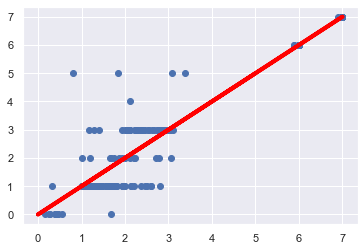

In [160]:
plt.scatter(RFG_PRED,Y_test)
plt.plot(Y_test,Y_test,linewidth=4,color='Red')

# Saving the model:

In [161]:
import pickle
filename='Powerplant_primary_fuel.pkl'
pickle.dump(RFG,open(filename,'wb'))

# Conclusion:

In [162]:
loaded_model=pickle.load(open('Powerplant_primary_fuel.pkl','rb'))
result=loaded_model.score(X_test,Y_test)
print(result*100)

88.19991053969656
